# DL_101: Optimization

## Influence of Weights, Bias and Activation Functions

In [1]:
%run C:\Users\anmuel\Vorlesungen\AI_Summer_School\Notebooks\DL_101\Optimization\helper.py

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # prevents a restart of the kernel
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from helper import *

Define problem and its partial derivatives f`(x0,x1) => here the Rosenbrock Funktion

In [3]:
def f(x0, x1):
    return 100 * (x0**2 - x1)**2 + (x0 - 1)**2

def f_prime_x0(x0, x1):
    return 2 * (200 * x0 * (x0**2 - x1) + x0 - 1)

def f_prime_x1(x0, x1):
    return -200 * (x0**2 - x1)

Plot Rosenbrock function

In [4]:
def plot_rosenbrock(downhill=False, x0=-1, x1=-1):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(projection='3d')
    #ax = fig.gca(projection='3d')

    s = 0.3
    X = np.arange(-2, 2.+s, s)
    Y = np.arange(-2, 3.+s, s)
        
    #Create the mesh grid(s) for all X/Y combos.
    X, Y = np.meshgrid(X, Y)
    #Rosenbrock function w/ two parameters using numpy Arrays
    Z = f(X, Y)

    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, alpha=0.5)
    # Global minimum
    ax.scatter(1, 1, f(1, 1), color="red", marker="*", s=200)
    # Starting point
    ax.scatter(x0, x1, f(x0, x1), color="green", marker="o", s=200)

    if downhill:
        eps = 50
        # Plot Updated Points
        for (x0, x1) in downhill:
            ax.scatter(x0, x1, f(x0, x1)+eps, color="green", marker="o", s=50)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()



Global Minimum at:  1 1
Start at x =  -0.46900797682437245 1.0771192129065028
With f(x) =  75.6287219296327


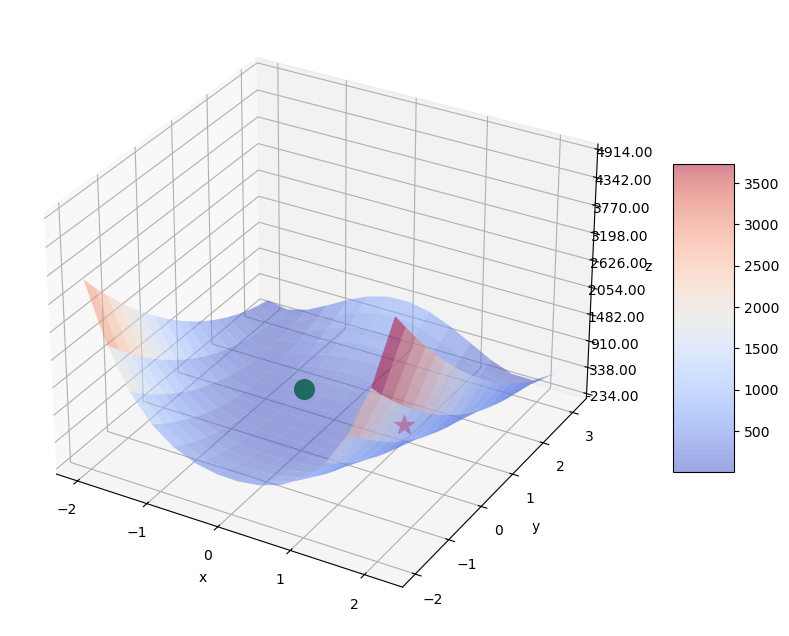

Solution:  9.698332254765587e-09
x0 =  0.9999015198890396
x1 =  0.9998030494764115


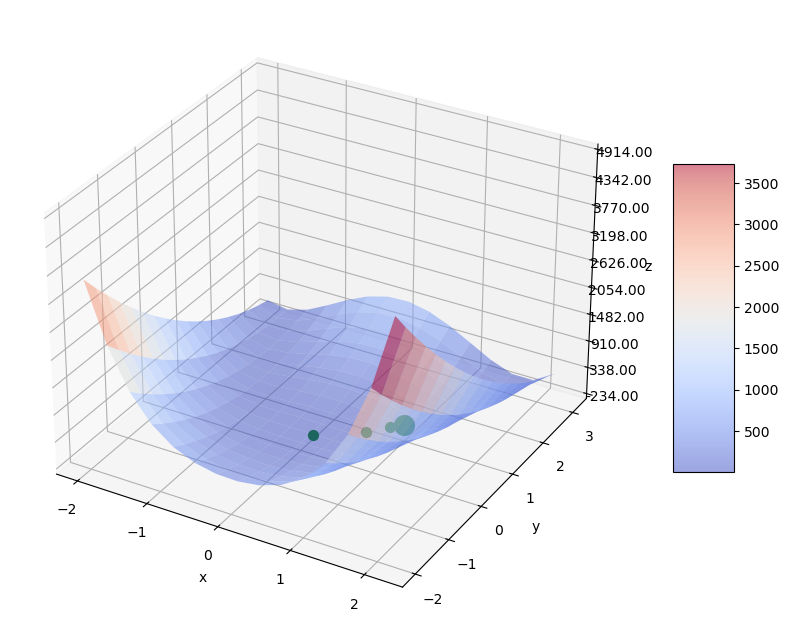

In [5]:
x0 = np.random.uniform(-2, 2)
x1 = np.random.uniform(-2, 2)
y = f(x0, x1)

print("\n\nGlobal Minimum at: ", 1, 1)
print("Start at x = ", x0, x1)
print("With f(x) = ", y)
plot_rosenbrock(x0=x0, x1=x1)

eta = 0.005
it = 0
stop_iter = 1000

downhill_points = []

while it < stop_iter:
    x0 = x0 - eta * f_prime_x0(x0, x1)
    x1 = x1 - eta * f_prime_x1(x0, x1)
    it += 1
    fx = f(x0, x1)
    if it % 100 == 0:
        downhill_points.append([x0, x1])

print("Solution: ", fx)
print("x0 = ", x0)
print("x1 = ", x1)
plot_rosenbrock(downhill=downhill_points, x0=x0, x1=x1)

[-0.56712013  0.20929228] 8.0772705
[-0.3428078   0.12383569] 1.812029
[-0.14468391  0.02416372] 1.3161875
[0.05895314 0.00252596] 0.88916653
[0.21760844 0.04451511] 0.615009
[0.32891542 0.10509846] 0.45256895
[0.41010064 0.16528112] 0.34965757
[0.47263587 0.22074428] 0.279399
[0.52289116 0.27102584] 0.22863954
[0.564553   0.31655395] 0.19041735
[0.5998987  0.35790676] 0.16073273
[0.63042027 0.39562717] 0.13712539
[0.65714383 0.43018317] 0.11799685
[0.68080336 0.46196812] 0.10226208
[0.70194125 0.4913112 ] 0.089157686
[0.7209693 0.5184884] 0.078130566
[0.73820734 0.5437331 ] 0.068769805
[0.75390923 0.56724435] 0.06076353
[0.76827854 0.5891915 ] 0.053871267
[0.78148234 0.60972166] 0.047904104
[0.7936585  0.62896234] 0.04271202
[0.8049231 0.647026 ] 0.038174015
[0.81537336 0.6640103 ] 0.034192096
[0.82509255 0.6800019 ] 0.030685704
[0.8341524 0.6950783] 0.027588105
[0.84261495 0.70930874] 0.02484366
[0.85053396 0.72275454] 0.02240577
[0.8579571 0.735472 ] 0.020234901
[0.8649263 0.7475118

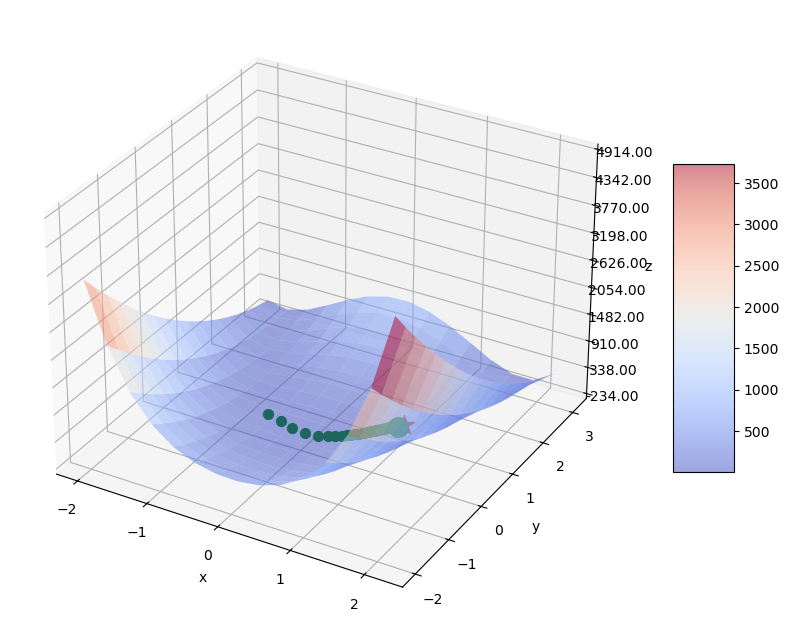

In [7]:
class Model:
    def __init__(self):
        self.x = tf.Variable(tf.random.uniform(shape=[2], minval=-2.0, maxval=2.0)) # x = [x0, x1]
        self.learning_rate = 0.001 # eta
        self.optimizer = tf.optimizers.SGD(learning_rate=self.learning_rate) # SGD = (stochastic) gradient descent; Adam
        self.current_loss_val = self.loss()
    
    def loss(self):
        self.current_loss_val = 100 * (self.x[0]**2 - self.x[1])**2 + (self.x[0] - 1)**2
        return self.current_loss_val
    
    def fit(self):
        self.optimizer.minimize(self.loss, self.x) # loss function, variables 
    
model = Model()
downhill_points = []

for it in range(5000):
    model.fit()
    if it % 100 == 0:
        print(model.x.numpy(), model.current_loss_val.numpy())
        downhill_points.append(model.x.numpy())

plot_rosenbrock(downhill=downhill_points, x0=downhill_points[-1][0], x1=downhill_points[-1][1])